<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Pie Charts**


Estimated time needed: **30** minutes


- In this lab, you will focus on visualizing data.

- The provided dataset will be loaded into pandas for analysis.

- Various pie charts will be created to:
   - Analyze developer preferences.
  
   - Identify technology usage trends.
    
- The lab aims to provide insights into key variables using visual representations.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [17]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



In [18]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2026-02-28 08:52:06--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  27.8MB/s    in 5.3s    

2026-02-28 08:52:12 (28.9 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Composition with Pie Charts


##### 1.1 Create a Pie Chart of the Top 5 Databases Respondents Want to Work With


In the survey data, the `DatabaseWantToWorkWith` column lists the databases that respondents wish to work with. Let’s visualize the top 5 most-desired databases in a pie chart.



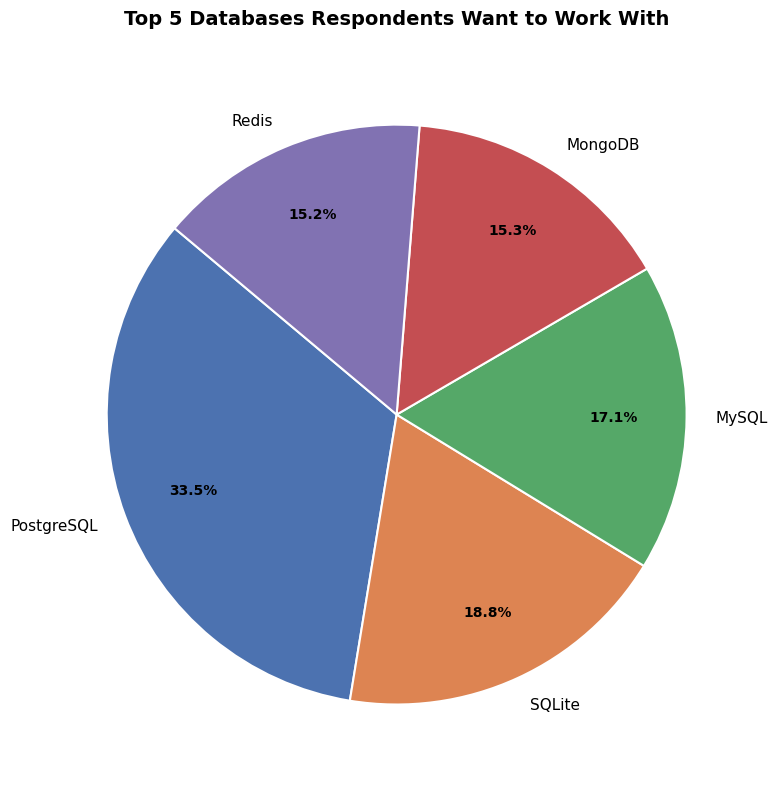

In [10]:
##Write your code here
#df["DatabaseWantToWorkWith"].head(6)

#To get the data out of DatabaseWantToWorkWith 
df_counts = df["DatabaseWantToWorkWith"].str.split(";").explode().str.strip()
top5 = df_counts.value_counts().nlargest(5)


fig, ax = plt.subplots(figsize=(8, 8))

wedges, texts, autotexts = ax.pie(
    top5.values,
    labels=top5.index,
    autopct="%1.1f%%",  
    startangle=140,
    colors=["#4C72B0", "#DD8452", "#55A868", "#C44E52", "#8172B2"],
    wedgeprops={"edgecolor": "white", "linewidth": 1.5},
    pctdistance=0.75
)

#Setting font sizes after plotting
for text in texts:
    text.set_fontsize(11)
for autotext in autotexts:
    autotext.set_fontsize(10)
    autotext.set_fontweight("bold")

ax.set_title("Top 5 Databases Respondents Want to Work With",
             fontsize=14, fontweight="bold", pad=20)
plt.tight_layout()
plt.show()


The `DevType` column lists the developer types for respondents. We’ll examine the distribution by showing the top 5 developer roles in a pie chart.



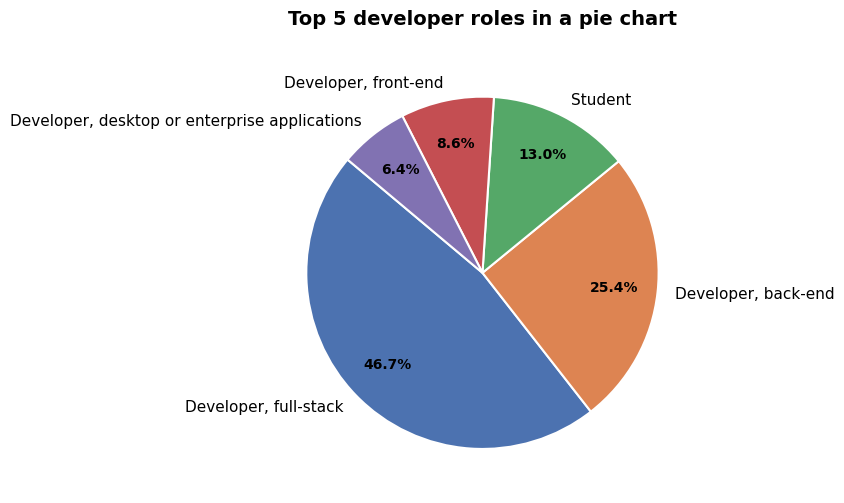

In [13]:
##Write your code here
df_counts_DevType = df["DevType"].str.split(";").explode().str.strip()
top5_DevType = df_counts_DevType.value_counts().nlargest(5)


fig, ax = plt.subplots(figsize=(8, 8))

wedges, texts, autotexts = ax.pie(
    top5_DevType.values,
    labels=top5_DevType.index,
    autopct="%1.1f%%",  
    startangle=140,
    colors=["#4C72B0", "#DD8452", "#55A868", "#C44E52", "#8172B2"],
    wedgeprops={"edgecolor": "white", "linewidth": 1.5},
    pctdistance=0.75
)

#Setting font sizes after plotting
for text in texts:
    text.set_fontsize(11)
for autotext in autotexts:
    autotext.set_fontsize(10)
    autotext.set_fontweight("bold")

ax.set_title("Top 5 developer roles in a pie chart",
             fontsize=14, fontweight="bold", pad=20)
plt.tight_layout()
plt.show()

##### 1.3 Create a pie chart for the operating systems used by respondents for professional use


The `OpSysProfessional` use column shows the operating systems developers use professionally. Let’s visualize the distribution of the top operating systems in a pie chart.



### Task 2: Additional Visualizations and Comparisons


##### 2.1 Pie Chart for Top 5 Programming Languages Respondents Have Worked With


The `LanguageHaveWorkedWith` column contains the programming languages that respondents have experience with. We’ll plot a pie chart to display the composition of the top 5 languages.



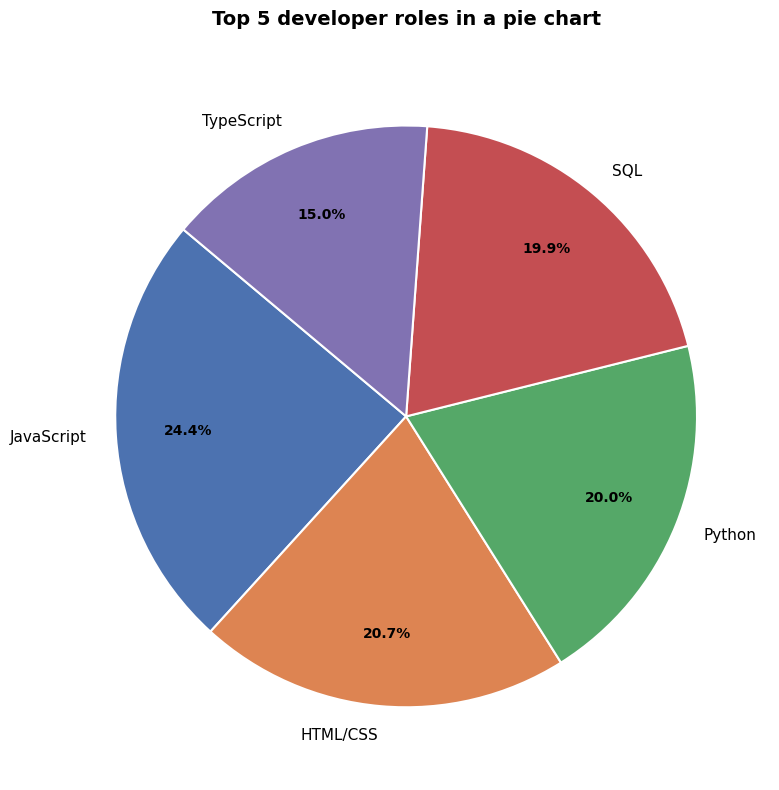

In [21]:
##Write your code here

df_counts_LHWW = df["LanguageHaveWorkedWith"].str.split(";").explode().str.strip()
top5_LHWW = df_counts_LHWW.value_counts().nlargest(5)


fig, ax = plt.subplots(figsize=(8, 8))

wedges, texts, autotexts = ax.pie(
    top5_LHWW.values,
    labels=top5_LHWW.index,
    autopct="%1.1f%%",  
    startangle=140,
    colors=["#4C72B0", "#DD8452", "#55A868", "#C44E52", "#8172B2"],
    wedgeprops={"edgecolor": "white", "linewidth": 1.5},
    pctdistance=0.75
)

#Setting font sizes after plotting
for text in texts:
    text.set_fontsize(11)
for autotext in autotexts:
    autotext.set_fontsize(10)
    autotext.set_fontweight("bold")

ax.set_title("Composition of the top 5 languages",
             fontsize=14, fontweight="bold", pad=20)
plt.tight_layout()
plt.show()

##### 2.2 Pie Chart for Top Collaboration Tools used in Professional Use


Using the `NEWCollabToolsHaveWorkedWith` column, we’ll identify and visualize the top collaboration tools respondents use in their professional work.



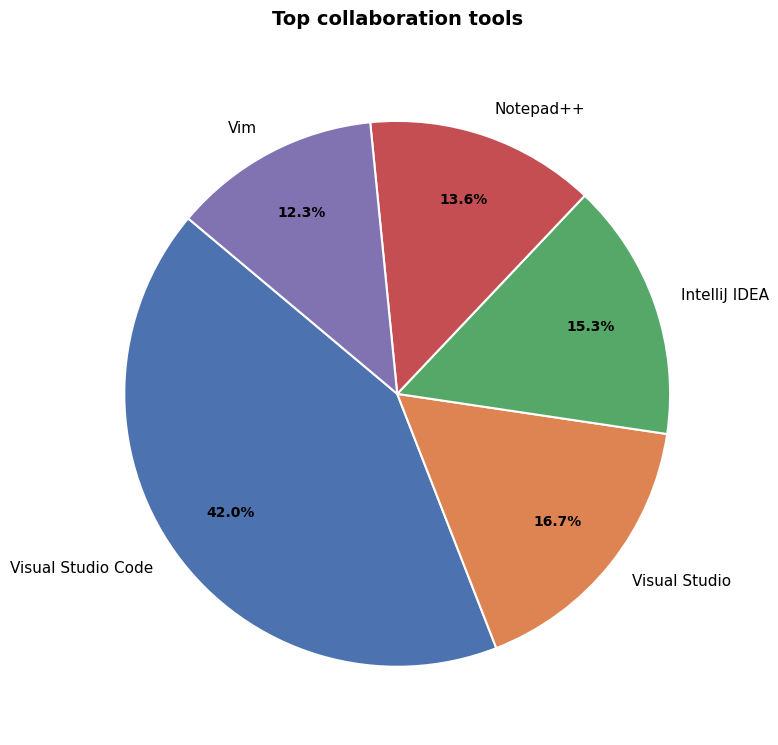

In [22]:
##Write your code here
df_counts_NC = df["NEWCollabToolsHaveWorkedWith"].str.split(";").explode().str.strip()
top5_NC = df_counts_NC.value_counts().nlargest(5)


fig, ax = plt.subplots(figsize=(8, 8))

wedges, texts, autotexts = ax.pie(
    top5_NC.values,
    labels=top5_NC.index,
    autopct="%1.1f%%",  
    startangle=140,
    colors=["#4C72B0", "#DD8452", "#55A868", "#C44E52", "#8172B2"],
    wedgeprops={"edgecolor": "white", "linewidth": 1.5},
    pctdistance=0.75
)

#Setting font sizes after plotting
for text in texts:
    text.set_fontsize(11)
for autotext in autotexts:
    autotext.set_fontsize(10)
    autotext.set_fontweight("bold")

ax.set_title("Top collaboration tools",
             fontsize=14, fontweight="bold", pad=20)
plt.tight_layout()
plt.show()


### Task 3: Analyzing and Interpreting Composition


In this task, you will create additional pie charts to analyze specific aspects of the survey data. Use `pandas` and `matplotlib` to complete each task and interpret the findings.



##### 3.1 Pie Chart of `Respondents` Most Admired Programming Languages


The `LanguageAdmired` column lists the programming languages respondents admire most. Create a pie chart to visualize the top 5 admired languages.



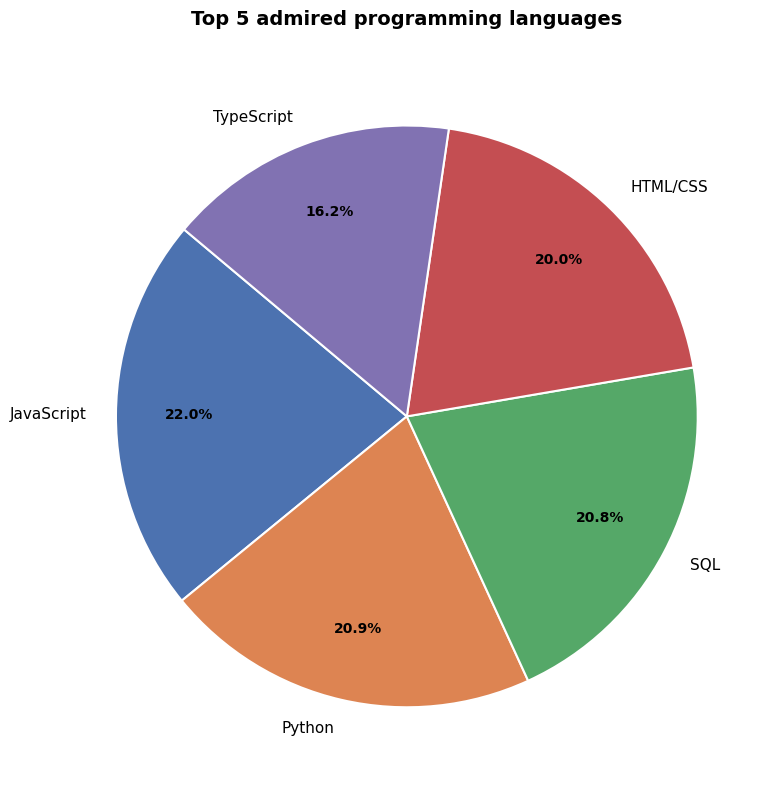

In [23]:
##Write your code here
df_counts_LA = df["LanguageAdmired"].str.split(";").explode().str.strip()
top5_LA = df_counts_LA.value_counts().nlargest(5)


fig, ax = plt.subplots(figsize=(8, 8))

wedges, texts, autotexts = ax.pie(
    top5_LA.values,
    labels=top5_LA.index,
    autopct="%1.1f%%",  
    startangle=140,
    colors=["#4C72B0", "#DD8452", "#55A868", "#C44E52", "#8172B2"],
    wedgeprops={"edgecolor": "white", "linewidth": 1.5},
    pctdistance=0.75
)

#Setting font sizes after plotting
for text in texts:
    text.set_fontsize(11)
for autotext in autotexts:
    autotext.set_fontsize(10)
    autotext.set_fontweight("bold")

ax.set_title("Top 5 admired programming languages",
             fontsize=14, fontweight="bold", pad=20)
plt.tight_layout()
plt.show()

##### 3.3 Pie Chart for Preferred Web Frameworks


The `WebframeWantToWorkWith` column includes web frameworks that respondents are interested in working with. Visualize the top 5 frameworks in a pie chart.



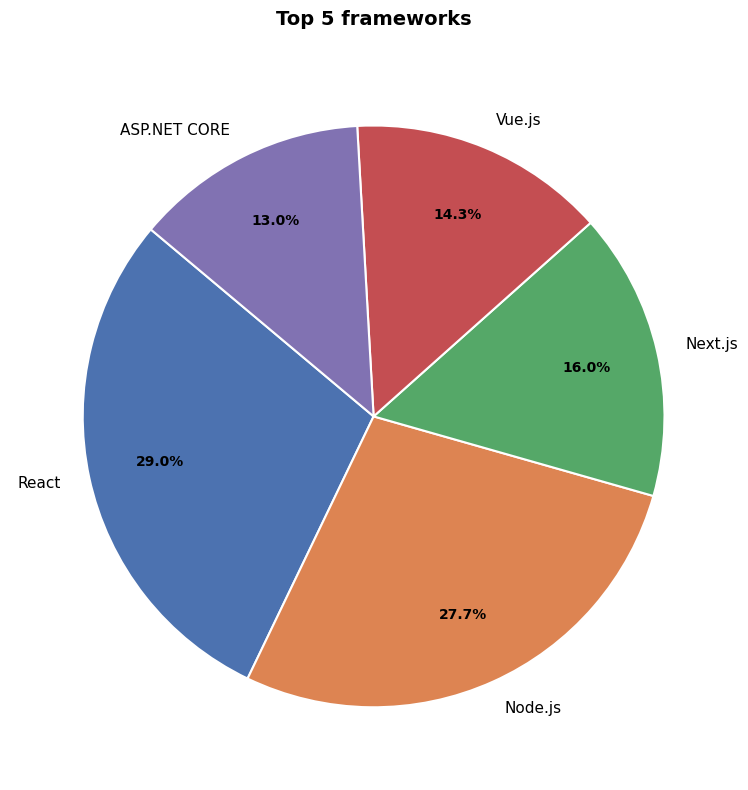

In [25]:
##Write your code here
df_counts_WF = df["WebframeWantToWorkWith"].str.split(";").explode().str.strip()
top5_WF = df_counts_WF.value_counts().nlargest(5)


fig, ax = plt.subplots(figsize=(8, 8))

wedges, texts, autotexts = ax.pie(
    top5_WF.values,
    labels=top5_WF.index,
    autopct="%1.1f%%",  
    startangle=140,
    colors=["#4C72B0", "#DD8452", "#55A868", "#C44E52", "#8172B2"],
    wedgeprops={"edgecolor": "white", "linewidth": 1.5},
    pctdistance=0.75
)

#Setting font sizes after plotting
for text in texts:
    text.set_fontsize(11)
for autotext in autotexts:
    autotext.set_fontsize(10)
    autotext.set_fontweight("bold")

ax.set_title("Top 5 frameworks",
             fontsize=14, fontweight="bold", pad=20)
plt.tight_layout()
plt.show()

### Summary


After completing this lab, you will be able to:
- Create pie charts to visualize developer preferences across databases, programming languages, AI tools, and cloud platforms.
- Identify trends in technology usage, role distribution, and tool adoption through pie charts.
- Analyze and compare data composition across various categories to gain insights into developer preferences.




## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
